In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error
dataframe=pd.read_csv("./weatherDaNang_2019.csv")

In [2]:
import gspread
import pandas as pd
import numpy as np
gc=gspread.service_account(filename="./credentials.json")
# read data and put it in a dataframe
gsheets = gc.open_by_key('1sLYt4uMzQM0zqQGN36J8m0hgSkSJvrhf7fYxD4UUIuI')
worksheet = gsheets.get_worksheet(0)
rows=worksheet.get_all_values()
df=pd.DataFrame(worksheet.get_all_records())
last60_row=rows[-60:]
dataframeTest = pd.DataFrame(last60_row, columns=rows[0])
print(dataframeTest.head())

       TIMESTAMP TEMPERATURE HUMIDITY ISRAINING
0  21042022 1200        28.0       70         0
1  21042022 1300        28.0       70         0
2  21042022 1400        28.0       70         0
3  21042022 1500        28.0       74         0
4  21042022 1600        27.0       74         0


In [3]:
dataset_temp = dataframe.iloc[:,1:2].values
dataset_humi = dataframe.iloc[:,2:3].values
dataset_israining = dataframe.iloc[:,3:4].values
input_temp = dataframeTest.iloc[:,1:2].values
input_humi = dataframeTest.iloc[:,2:3].values
input_israining = dataframeTest.iloc[:,3:4].values

sc = MinMaxScaler(feature_range = (0, 1))

In [4]:
def Temperature_Forecast_Model(dataset_temp):
    sc = MinMaxScaler(feature_range = (0, 1))
    dataset_scaled = sc.fit_transform(dataset_temp)
    features_train = []
    labels_train = []
    #60 timesteps and 1 output
    for i in range(60, len(dataset_temp)):
        features_train.append(dataset_scaled[i-60:i, 0]) 
        labels_train.append(dataset_scaled[i, 0])
    features_train, labels_train = np.array(features_train), np.array(labels_train)
    features_train = np.reshape(features_train, (features_train.shape[0], features_train.shape[1]))
    model = LinearRegression().fit(features_train, labels_train)
    return model


In [5]:
def Humidity_Forecast_Model(dataset_humi):
    sc = MinMaxScaler(feature_range = (0, 1))
    dataset_scaled = sc.fit_transform(dataset_humi)
    features_train = []
    labels_train = []
    #60 timesteps and 1 output
    for i in range(60, len(dataset_humi)):
        features_train.append(dataset_scaled[i-60:i, 0]) 
        labels_train.append(dataset_scaled[i, 0])
    features_train, labels_train = np.array(features_train), np.array(labels_train)
    features_train = np.reshape(features_train, (features_train.shape[0], features_train.shape[1]))
    model = LinearRegression().fit(features_train, labels_train)
    return model

In [6]:
def Israining_Forecast_Model(dataset_israining):
    sc = MinMaxScaler(feature_range = (0, 1))
    dataset_scaled = sc.fit_transform(dataset_israining)
    features_train = []
    labels_train = []
    #60 timesteps and 1 output
    for i in range(60, len(dataset_israining)):
        features_train.append(dataset_scaled[i-60:i, 0]) 
        labels_train.append(dataset_scaled[i, 0])
    features_train, labels_train = np.array(features_train), np.array(labels_train)
    features_train = np.reshape(features_train, (features_train.shape[0], features_train.shape[1]))
    model = LinearRegression().fit(features_train, labels_train)
    return model

In [7]:
dataset_scaled = sc.fit_transform(dataset_temp)
input_temp = input_temp.reshape(-1,1)
#chuan hoa de dua vao model
input_temp = sc.transform(input_temp)

In [8]:
count=0
lsttemperature_forecast=[]
while count < 24: #predict 24 giờ forward
  input_temp = input_temp.reshape(-1,1)
  features_test = []
  features_test.append(input_temp)
  features_test = np.array(features_test)
  features_test = np.reshape(features_test, (features_test.shape[0], features_test.shape[1]))
  #print(features_test.shape)
  temperature_forecast = Temperature_Forecast_Model(dataset_temp).predict(features_test)
  #print(temperature_forecast)
  input_temp = np.append(input_temp, temperature_forecast)
  input_temp = np.delete(input_temp, 0)
  lsttemperature_forecast.append(temperature_forecast)
  count+=1

#Hieu la: temp(tại n)= f[temp(tại n-60),temp(tại n-59),.... ,temp(tại n-1)]     

lsttemperature_forecast = sc.inverse_transform(lsttemperature_forecast) - 1
lsttemperature_forecast = lsttemperature_forecast.flatten()
lsttemperature_forecast = np.round(lsttemperature_forecast, decimals = 1)
print(lsttemperature_forecast)

[25.2 24.9 24.5 25.2 24.4 24.5 25.8 26.3 28.  29.3 30.2 30.1 29.9 29.4
 29.2 28.8 27.1 27.1 26.7 26.2 26.3 26.2 26.2 26. ]


In [9]:
dataset_scaled = sc.fit_transform(dataset_humi)
input_humi = input_humi.reshape(-1,1)
#chuan hoa de dua vao model
input_humi = sc.transform(input_humi)

In [10]:
count=0
lsthumidity_forecast=[]
while count < 24: #predict 24 giờ forward
  input_humi = input_humi.reshape(-1,1)
  features_test = []
  features_test.append(input_humi)
  features_test = np.array(features_test)
  features_test = np.reshape(features_test, (features_test.shape[0], features_test.shape[1]))
  #print(features_test.shape)
  humidity_forecast = Humidity_Forecast_Model(dataset_humi).predict(features_test)
  #print(humidity_forecast)
  input_humi = np.append(input_humi, humidity_forecast)
  input_humi = np.delete(input_humi, 0)
  lsthumidity_forecast.append(humidity_forecast)
  count+=1

#Hieu la: temp(tại n)= f[temp(tại n-60),temp(tại n-59),.... ,temp(tại n-1)]     

lsthumidity_forecast = sc.inverse_transform(lsthumidity_forecast) - 3
lsthumidity_forecast = lsthumidity_forecast.flatten()
lsthumidity_forecast = np.round(lsthumidity_forecast, decimals = 1)
print(lsthumidity_forecast)

[82.2 82.2 84.6 79.9 81.7 81.9 77.8 74.3 68.9 64.1 64.2 62.  64.2 65.2
 65.1 67.7 74.8 75.  76.2 82.2 81.7 82.5 81.  83.2]


In [11]:
dataset_scaled = sc.fit_transform(dataset_israining)
input_israining = input_israining.reshape(-1,1)
#chuan hoa de dua vao model
input_israining = sc.transform(input_israining)

In [12]:
count=0
lstisraining_forecast=[]
while count < 24: #predict 24 giờ forward
  input_israining = input_israining.reshape(-1,1)
  features_test = []
  features_test.append(input_israining)
  features_test = np.array(features_test)
  features_test = np.reshape(features_test, (features_test.shape[0], features_test.shape[1]))
  #print(features_test.shape)
  israining_forecast = Israining_Forecast_Model(dataset_israining).predict(features_test)
  input_israining = np.append(input_israining, israining_forecast)
  input_israining = np.delete(input_israining, 0)
  lstisraining_forecast.append(israining_forecast)
  count+=1

#Hieu la: temp(tại n)= f[temp(tại n-60),temp(tại n-59),.... ,temp(tại n-1)]     

lstisraining_forecast = np.round(lstisraining_forecast, decimals = 5)
lstisraining_forecast = lstisraining_forecast.flatten()
print(lstisraining_forecast)

[0.01853 0.02779 0.03487 0.04023 0.04478 0.0484  0.05219 0.05544 0.05836
 0.06091 0.06263 0.06446 0.06665 0.06861 0.07027 0.07147 0.07327 0.07491
 0.07642 0.07843 0.08076 0.08296 0.08553 0.08856]


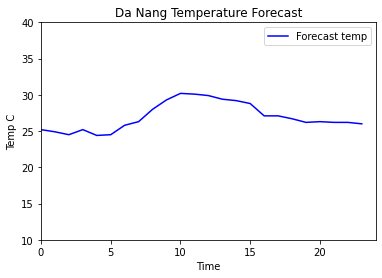

In [13]:
plt.plot(lsttemperature_forecast, color = 'blue', label = 'Forecast temp')
plt.axis((0,24,10,40))
plt.title('Da Nang Temperature Forecast')
plt.xlabel('Time')
plt.ylabel('Temp C')
plt.legend()
plt.show()

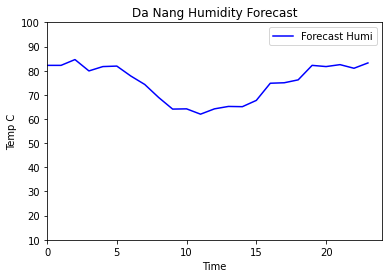

In [14]:
plt.plot(lsthumidity_forecast, color = 'blue', label = 'Forecast Humi')
plt.axis((0,24,10,100))
plt.title('Da Nang Humidity Forecast')
plt.xlabel('Time')
plt.ylabel('Temp C')
plt.legend()
plt.show()

In [15]:
rows=worksheet.get_all_values()
last_row=len(rows)
date=worksheet.cell(last_row,1).value
#print(date)
from datetime import datetime
date_time_obj = datetime.strptime(date, '%d%m%Y %H%M')
#print(date_time_obj)


In [16]:
import datetime
delta1 = datetime.timedelta(hours=1)

lstdate=[]
count=0
while count <24:
  date_time_obj =date_time_obj+ delta1
  date_time_ = date_time_obj.strftime("%d%m%Y %H%M")
  #print(date_time_)
  lstdate.append(date_time_)
  count+=1
#print(lstdate)

In [17]:
OneDayHours_forecast= pd.DataFrame(list(zip(lstdate,lsttemperature_forecast,lsthumidity_forecast,lstisraining_forecast)),
               columns =['TIMESTAMP','TEMPERATURE','HUMIDITY','ISRAINING'])
print(OneDayHours_forecast)

        TIMESTAMP  TEMPERATURE  HUMIDITY  ISRAINING
0   24042022 0000         25.2      82.2    0.01853
1   24042022 0100         24.9      82.2    0.02779
2   24042022 0200         24.5      84.6    0.03487
3   24042022 0300         25.2      79.9    0.04023
4   24042022 0400         24.4      81.7    0.04478
5   24042022 0500         24.5      81.9    0.04840
6   24042022 0600         25.8      77.8    0.05219
7   24042022 0700         26.3      74.3    0.05544
8   24042022 0800         28.0      68.9    0.05836
9   24042022 0900         29.3      64.1    0.06091
10  24042022 1000         30.2      64.2    0.06263
11  24042022 1100         30.1      62.0    0.06446
12  24042022 1200         29.9      64.2    0.06665
13  24042022 1300         29.4      65.2    0.06861
14  24042022 1400         29.2      65.1    0.07027
15  24042022 1500         28.8      67.7    0.07147
16  24042022 1600         27.1      74.8    0.07327
17  24042022 1700         27.1      75.0    0.07491
18  24042022

In [18]:
gsheets = gc.open_by_key('1sLYt4uMzQM0zqQGN36J8m0hgSkSJvrhf7fYxD4UUIuI')
worksheet2 = gsheets.get_worksheet(2)
#worksheet2 = gsheets.sheet1
rows=worksheet2.get_all_values()
last_row=len(rows)
all_row=OneDayHours_forecast.values.tolist()
worksheet2.delete_rows(2,last_row)
worksheet2.insert_rows(all_row,2)

{'spreadsheetId': '1sLYt4uMzQM0zqQGN36J8m0hgSkSJvrhf7fYxD4UUIuI',
 'updates': {'spreadsheetId': '1sLYt4uMzQM0zqQGN36J8m0hgSkSJvrhf7fYxD4UUIuI',
  'updatedRange': "'Predict Weather LR'!A2:D25",
  'updatedRows': 24,
  'updatedColumns': 4,
  'updatedCells': 96}}